In [1]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
import pandas as pd
df = pd.read_csv("CryptoData_SocialMedia_1.csv")
df

Ticker            Name  Twitter  Telegram  Reddit   Total  \
0       ENQ         Enecuum        3         0       0     3.0   
1      ATOM          Cosmos      451         2     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
...     ...             ...      ...       ...     ...     ...   
1106   Ever       Everscale     3074       129    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   
1108    STT       StarTerra        3         1       1     5.0   
1109     QI           BENQI        4         0       0     4.0   
1110    DFL       DeFi Land        4         0       0     5.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
0           0.000000e+00   0.053671   1.062127e+07  5.327378e+05  
1           0.000000e+00  25.364063   5.729132e+09  5.785691e+08  
2           0.000000e+00   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           0.000000e+00   0.810200   1.039659e+07  6.292306e+03  
...                  ...        ...            ...           ...  
1106        0.000000e+00   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  
1108        0.000000e+00   4.590679   1.052634e+08  0.000000e+00  
1109        0.000000e+00   0.176787   5.757804e+07  2.935992e+07  
1110        0.000000e+00   0.205810   1.206737e+08  5.459872e+06  

[1111 rows x 10 columns]

In [56]:
#Data Cleaning

In [7]:
print(df[df['Transaction Volume'] == 0].shape)
print(df[df['Twitter'] == 0].shape)
print(df[df['Telegram'] == 0].shape)
print(df[df['Reddit'] == 0].shape)

(503, 10)
(0, 10)
(764, 10)
(313, 10)


In [5]:
#Replace Telegram with 0 and 1

def dummy(row):
    if row['Telegram'] == 0:
        val = 0
    else:
        val = 1
    return val

df['Telegram'] = df.apply(dummy, axis=1)
df

Ticker            Name  Twitter  Telegram  Reddit   Total  \
0       ENQ         Enecuum        3         0       0     3.0   
1      ATOM          Cosmos      451         1     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
...     ...             ...      ...       ...     ...     ...   
1106   Ever       Everscale     3074         1    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   
1108    STT       StarTerra        3         1       1     5.0   
1109     QI           BENQI        4         0       0     4.0   
1110    DFL       DeFi Land        4         0       0     5.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
0           0.000000e+00   0.053671   1.062127e+07  5.327378e+05  
1           0.000000e+00  25.364063   5.729132e+09  5.785691e+08  
2           0.000000e+00   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           0.000000e+00   0.810200   1.039659e+07  6.292306e+03  
...                  ...        ...            ...           ...  
1106        0.000000e+00   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  
1108        0.000000e+00   4.590679   1.052634e+08  0.000000e+00  
1109        0.000000e+00   0.176787   5.757804e+07  2.935992e+07  
1110        0.000000e+00   0.205810   1.206737e+08  5.459872e+06  

[1111 rows x 10 columns]

In [23]:
#Replace Redit with 1
def dummy(row):
    if row['Reddit'] == 0:
        val = 0
    else:
        val = 1
    return val

df['Reddit'] = df.apply(dummy, axis=1)
df

<ipython-input-23-6dede132a953>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reddit'] = df.apply(dummy, axis=1)


Ticker            Name  Twitter  Telegram  Reddit   Total  \
0       ENQ         Enecuum        3         0       0     3.0   
1      ATOM          Cosmos      451         1       1   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       1    20.0   
4      ANCT          Anchor      119         0       1   132.0   
...     ...             ...      ...       ...     ...     ...   
1105   FINA  Defina Finance        9         0       0     9.0   
1106   Ever       Everscale     3074         1       1  4301.0   
1107    DPR  Deeper Network        1         0       1     3.0   
1109     QI           BENQI        4         0       0     4.0   
1110    DFL       DeFi Land        4         0       0     5.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
0           1.598841e+12   0.053671   1.062127e+07  5.327378e+05  
1           1.598841e+12  25.364063   5.729132e+09  5.785691e+08  
2           1.598841e+12   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           1.598841e+12   0.810200   1.039659e+07  6.292306e+03  
...                  ...        ...            ...           ...  
1105        1.598841e+12   2.695692   2.023629e+07  3.812359e+06  
1106        1.598841e+12   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  
1109        1.598841e+12   0.176787   5.757804e+07  2.935992e+07  
1110        1.598841e+12   0.205810   1.206737e+08  5.459872e+06  

[991 rows x 10 columns]

In [8]:
#drop all 0's from the USD Volume column
df = df[df['USD Volume'] !=0]
df

Ticker            Name  Twitter  Telegram  Reddit   Total  \
0       ENQ         Enecuum        3         0       0     3.0   
1      ATOM          Cosmos      451         2     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
...     ...             ...      ...       ...     ...     ...   
1105   FINA  Defina Finance        9         0       0     9.0   
1106   Ever       Everscale     3074       129    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   
1109     QI           BENQI        4         0       0     4.0   
1110    DFL       DeFi Land        4         0       0     5.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
0           0.000000e+00   0.053671   1.062127e+07  5.327378e+05  
1           0.000000e+00  25.364063   5.729132e+09  5.785691e+08  
2           0.000000e+00   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           0.000000e+00   0.810200   1.039659e+07  6.292306e+03  
...                  ...        ...            ...           ...  
1105        0.000000e+00   2.695692   2.023629e+07  3.812359e+06  
1106        0.000000e+00   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  
1109        0.000000e+00   0.176787   5.757804e+07  2.935992e+07  
1110        0.000000e+00   0.205810   1.206737e+08  5.459872e+06  

[991 rows x 10 columns]

In [9]:
#Replace with mean
df['Transaction Volume']=df['Transaction Volume'].replace(0,df['Transaction Volume'].mean())
df

<ipython-input-9-19471d416c1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Volume']=df['Transaction Volume'].replace(0,df['Transaction Volume'].mean())


Ticker            Name  Twitter  Telegram  Reddit   Total  \
0       ENQ         Enecuum        3         0       0     3.0   
1      ATOM          Cosmos      451         2     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
...     ...             ...      ...       ...     ...     ...   
1105   FINA  Defina Finance        9         0       0     9.0   
1106   Ever       Everscale     3074       129    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   
1109     QI           BENQI        4         0       0     4.0   
1110    DFL       DeFi Land        4         0       0     5.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
0           1.598841e+12   0.053671   1.062127e+07  5.327378e+05  
1           1.598841e+12  25.364063   5.729132e+09  5.785691e+08  
2           1.598841e+12   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           1.598841e+12   0.810200   1.039659e+07  6.292306e+03  
...                  ...        ...            ...           ...  
1105        1.598841e+12   2.695692   2.023629e+07  3.812359e+06  
1106        1.598841e+12   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  
1109        1.598841e+12   0.176787   5.757804e+07  2.935992e+07  
1110        1.598841e+12   0.205810   1.206737e+08  5.459872e+06  

[991 rows x 10 columns]

In [143]:
#Dropping Telegram
df.drop('Telegram', axis=1, inplace=True)
df

/Users/lisun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Ticker            Name  Twitter  Reddit   Total  Transaction Volume  \
0       ENQ         Enecuum        3       0     3.0        0.000000e+00   
1      ATOM          Cosmos      451     266   726.0        0.000000e+00   
2      KAVA            Kava        6       1     7.0        0.000000e+00   
3       TRU          TrueFi       17       3    20.0        1.372441e+08   
4      ANCT          Anchor      119      12   132.0        0.000000e+00   
...     ...             ...      ...     ...     ...                 ...   
1105   FINA  Defina Finance        9       0     9.0        0.000000e+00   
1106   Ever       Everscale     3074    1017  4301.0        0.000000e+00   
1107    DPR  Deeper Network        1       2     3.0        5.543234e+07   
1109     QI           BENQI        4       0     4.0        0.000000e+00   
1110    DFL       DeFi Land        4       0     5.0        0.000000e+00   

      USD Price  USD Marketcap    USD Volume  
0      0.053671   1.062127e+07  5.327378e+05  
1     25.364063   5.729132e+09  5.785691e+08  
2      3.982092   5.703552e+08  6.875262e+07  
3      0.320698   1.760490e+08  1.250333e+07  
4      0.810200   1.039659e+07  6.292306e+03  
...         ...            ...           ...  
1105   2.695692   2.023629e+07  3.812359e+06  
1106   0.267931   1.970242e+08  4.226416e+06  
1107   0.133866   1.387863e+08  2.913974e+06  
1109   0.176787   5.757804e+07  2.935992e+07  
1110   0.205810   1.206737e+08  5.459872e+06  

[991 rows x 9 columns]

In [10]:
#reducing all 0's from Reddit, sacrificing observations down to 716
df = df[df['Reddit'] != 0]
df

Ticker            Name  Twitter  Telegram  Reddit   Total  \
1      ATOM          Cosmos      451         2     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
5      ALBT   AllianceBlock        4         0       4     8.0   
...     ...             ...      ...       ...     ...     ...   
1100   SAMO     Samoyedcoin       38         0       1    39.0   
1101  SAITO           Saito        8         0       2    10.0   
1103  LOTTO           Lotto        8         0      10    18.0   
1106   Ever       Everscale     3074       129    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
1           1.598841e+12  25.364063   5.729132e+09  5.785691e+08  
2           1.598841e+12   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           1.598841e+12   0.810200   1.039659e+07  6.292306e+03  
5           6.394549e+07   0.578677   1.348062e+08  2.720597e+06  
...                  ...        ...            ...           ...  
1100        1.598841e+12   0.045175   1.232807e+08  1.306518e+07  
1101        5.449691e+08   0.055256   5.886985e+07  4.099738e+06  
1103        1.598841e+12   0.015811   3.162288e+07  3.899815e+03  
1106        1.598841e+12   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  

[716 rows x 10 columns]

In [11]:
print(df[df['Transaction Volume'] == 0].shape)
print(df[df['Twitter'] == 0].shape)
print(df[df['Total'] == 0].shape)
print(df[df['Reddit'] == 0].shape)
print(df[df['USD Price'] == 0].shape)
print(df[df['USD Marketcap'] == 0].shape)

(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


In [39]:
df['Total'].isnull().values.any()

True

In [35]:
df

Ticker            Name  Twitter  Reddit   Total  Transaction Volume  \
1      ATOM          Cosmos      451       1   726.0        1.598841e+12   
2      KAVA            Kava        6       1     7.0        1.598841e+12   
3       TRU          TrueFi       17       1    20.0        1.372441e+08   
4      ANCT          Anchor      119       1   132.0        1.598841e+12   
5      ALBT   AllianceBlock        4       1     8.0        6.394549e+07   
...     ...             ...      ...     ...     ...                 ...   
1100   SAMO     Samoyedcoin       38       1    39.0        1.598841e+12   
1101  SAITO           Saito        8       1    10.0        5.449691e+08   
1103  LOTTO           Lotto        8       1    18.0        1.598841e+12   
1106   Ever       Everscale     3074       1  4301.0        1.598841e+12   
1107    DPR  Deeper Network        1       1     3.0        5.543234e+07   

      USD Price  USD Marketcap    USD Volume  
1     25.364063   5.729132e+09  5.785691e+08  
2      3.982092   5.703552e+08  6.875262e+07  
3      0.320698   1.760490e+08  1.250333e+07  
4      0.810200   1.039659e+07  6.292306e+03  
5      0.578677   1.348062e+08  2.720597e+06  
...         ...            ...           ...  
1100   0.045175   1.232807e+08  1.306518e+07  
1101   0.055256   5.886985e+07  4.099738e+06  
1103   0.015811   3.162288e+07  3.899815e+03  
1106   0.267931   1.970242e+08  4.226416e+06  
1107   0.133866   1.387863e+08  2.913974e+06  

[716 rows x 9 columns]

In [40]:
df = df[df['Total'] !=0]
df

Ticker            Name  Twitter  Reddit   Total  Transaction Volume  \
1      ATOM          Cosmos      451       1   726.0        1.598841e+12   
2      KAVA            Kava        6       1     7.0        1.598841e+12   
3       TRU          TrueFi       17       1    20.0        1.372441e+08   
4      ANCT          Anchor      119       1   132.0        1.598841e+12   
5      ALBT   AllianceBlock        4       1     8.0        6.394549e+07   
...     ...             ...      ...     ...     ...                 ...   
1100   SAMO     Samoyedcoin       38       1    39.0        1.598841e+12   
1101  SAITO           Saito        8       1    10.0        5.449691e+08   
1103  LOTTO           Lotto        8       1    18.0        1.598841e+12   
1106   Ever       Everscale     3074       1  4301.0        1.598841e+12   
1107    DPR  Deeper Network        1       1     3.0        5.543234e+07   

      USD Price  USD Marketcap    USD Volume  
1     25.364063   5.729132e+09  5.785691e+08  
2      3.982092   5.703552e+08  6.875262e+07  
3      0.320698   1.760490e+08  1.250333e+07  
4      0.810200   1.039659e+07  6.292306e+03  
5      0.578677   1.348062e+08  2.720597e+06  
...         ...            ...           ...  
1100   0.045175   1.232807e+08  1.306518e+07  
1101   0.055256   5.886985e+07  4.099738e+06  
1103   0.015811   3.162288e+07  3.899815e+03  
1106   0.267931   1.970242e+08  4.226416e+06  
1107   0.133866   1.387863e+08  2.913974e+06  

[716 rows x 9 columns]

In [42]:
df['Total'].isnull().sum()

1

In [43]:
import pandas as pd
import numpy as np

In [49]:
IsNaN = df.isnull().any(axis=1)
rows_with_NaN = df[IsNaN]

print(rows_with_NaN)

    Ticker    Name  Twitter  Reddit  Total  Transaction Volume  USD Price  \
880   LINA  Linear       25       1    NaN         952523557.0   0.044099   

     USD Marketcap   USD Volume  
880    176556120.7  114286905.3  


In [12]:
df = df.dropna()
df

Ticker            Name  Twitter  Telegram  Reddit   Total  \
1      ATOM          Cosmos      451         2     266   726.0   
2      KAVA            Kava        6         0       1     7.0   
3       TRU          TrueFi       17         0       3    20.0   
4      ANCT          Anchor      119         0      12   132.0   
5      ALBT   AllianceBlock        4         0       4     8.0   
...     ...             ...      ...       ...     ...     ...   
1100   SAMO     Samoyedcoin       38         0       1    39.0   
1101  SAITO           Saito        8         0       2    10.0   
1103  LOTTO           Lotto        8         0      10    18.0   
1106   Ever       Everscale     3074       129    1017  4301.0   
1107    DPR  Deeper Network        1         0       2     3.0   

      Transaction Volume  USD Price  USD Marketcap    USD Volume  
1           1.598841e+12  25.364063   5.729132e+09  5.785691e+08  
2           1.598841e+12   3.982092   5.703552e+08  6.875262e+07  
3           1.372441e+08   0.320698   1.760490e+08  1.250333e+07  
4           1.598841e+12   0.810200   1.039659e+07  6.292306e+03  
5           6.394549e+07   0.578677   1.348062e+08  2.720597e+06  
...                  ...        ...            ...           ...  
1100        1.598841e+12   0.045175   1.232807e+08  1.306518e+07  
1101        5.449691e+08   0.055256   5.886985e+07  4.099738e+06  
1103        1.598841e+12   0.015811   3.162288e+07  3.899815e+03  
1106        1.598841e+12   0.267931   1.970242e+08  4.226416e+06  
1107        5.543234e+07   0.133866   1.387863e+08  2.913974e+06  

[715 rows x 10 columns]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['Ticker', 'Name', 'USD Price'])
y = df['USD Price']

#X, X_test, y, y_test = train_test_split(X, y,
                                       #test_size = 0.2,
                                       #random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 #test_size=0.25,
                                                 #random_state=42) 

model = LinearRegression()
lr = model.fit(X, y)

r_squared_train = lr.score(X, y)
#r_squared_val = lr.score(X_val, y_val)
#r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
#print(r_squared_val)
#print(r_squared_test)

0.11578660621611525


In [15]:
#Without logging the features and target - Analysis
x = df.drop(columns = ['Ticker', 'Name', 'USD Price'])
x = sm.add_constant(x)
y = df['USD Price']

model = sm.OLS(y, x, data = df)
crypto_model_non_log = model.fit()
crypto_model_non_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              USD Price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     13.23
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.42e-16
Time:                        12:23:19   Log-Likelihood:                -7077.3
No. Observations:                 715   AIC:                         1.417e+04
Df Residuals:                     707   BIC:                         1.421e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                331.9073    187.896      1.766      0.078     -36.993     700.807
Twitter                0.2560      0.825      0.310      0.757      -1.365       1.877
Telegram               4.8577      4.507      1.078      0.281      -3.990      13.706
Reddit                 0.3844      0.871      0.441      0.659      -1.326       2.095
Total                 -0.3915      0.834     -0.469      0.639      -2.030       1.246
Transaction Volume -3.942e-13   4.48e-12     -0.088      0.930   -9.19e-12    8.41e-12
USD Marketcap       4.514e-08   5.25e-09      8.594      0.000    3.48e-08    5.55e-08
USD Volume         -6.932e-08   6.77e-08     -1.023      0.307   -2.02e-07    6.37e-08
==============================================================================
Omnibus:                     1556.166   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3853877.746
Skew:                          17.678   Prob(JB):                         0.00
Kurtosis:                     360.926   Cond. No.                     4.21e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
#df.to_csv('CryptoData_SocialMedia_4.csv', index=False)

In [ ]:
#STARTING OVER, AFTER CLEANING and LOADING Different Versions of DATA

In [16]:
import pandas as pd
df = pd.read_csv("CryptoData_SocialMedia_3.csv")
df

Ticker            Name  Twitter  Reddit   Total  Transaction Volume  \
0     ATOM          Cosmos      451     266   726.0        1.598841e+12   
1     KAVA            Kava        6       1     7.0        1.598841e+12   
2      TRU          TrueFi       17       3    20.0        1.372441e+08   
3     ANCT          Anchor      119      12   132.0        1.598841e+12   
4     ALBT   AllianceBlock        4       4     8.0        6.394549e+07   
..     ...             ...      ...     ...     ...                 ...   
710   SAMO     Samoyedcoin       38       1    39.0        1.598841e+12   
711  SAITO           Saito        8       2    10.0        5.449691e+08   
712  LOTTO           Lotto        8      10    18.0        1.598841e+12   
713   Ever       Everscale     3074    1017  4301.0        1.598841e+12   
714    DPR  Deeper Network        1       2     3.0        5.543234e+07   

     USD Price  USD Marketcap    USD Volume  
0    25.364063   5.729132e+09  5.785691e+08  
1     3.982092   5.703552e+08  6.875262e+07  
2     0.320698   1.760490e+08  1.250333e+07  
3     0.810200   1.039659e+07  6.292306e+03  
4     0.578677   1.348062e+08  2.720597e+06  
..         ...            ...           ...  
710   0.045175   1.232807e+08  1.306518e+07  
711   0.055256   5.886985e+07  4.099738e+06  
712   0.015811   3.162288e+07  3.899815e+03  
713   0.267931   1.970242e+08  4.226416e+06  
714   0.133866   1.387863e+08  2.913974e+06  

[715 rows x 9 columns]

In [17]:
#Without logging the features and target - Analysis
x = df.drop(columns = ['Ticker', 'Name', 'USD Price'])
x = sm.add_constant(x)
y = df['USD Price']

model = sm.OLS(y, x, data = df)
crypto_model_non_log = model.fit()
crypto_model_non_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              USD Price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.86e-16
Time:                        12:23:36   Log-Likelihood:                -7077.9
No. Observations:                 715   AIC:                         1.417e+04
Df Residuals:                     708   BIC:                         1.420e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                317.4148    187.435      1.693      0.091     -50.581     685.411
Twitter               -0.2938      0.649     -0.453      0.651      -1.568       0.981
Reddit                -0.1236      0.733     -0.169      0.866      -1.563       1.315
Total                  0.2072      0.623      0.333      0.739      -1.015       1.430
Transaction Volume -4.654e-13   4.48e-12     -0.104      0.917   -9.27e-12    8.33e-12
USD Marketcap       4.507e-08   5.25e-09      8.580      0.000    3.48e-08    5.54e-08
USD Volume         -7.053e-08   6.77e-08     -1.041      0.298   -2.04e-07    6.25e-08
==============================================================================
Omnibus:                     1554.691   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3834524.424
Skew:                          17.639   Prob(JB):                         0.00
Kurtosis:                     360.025   Cond. No.                     4.19e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

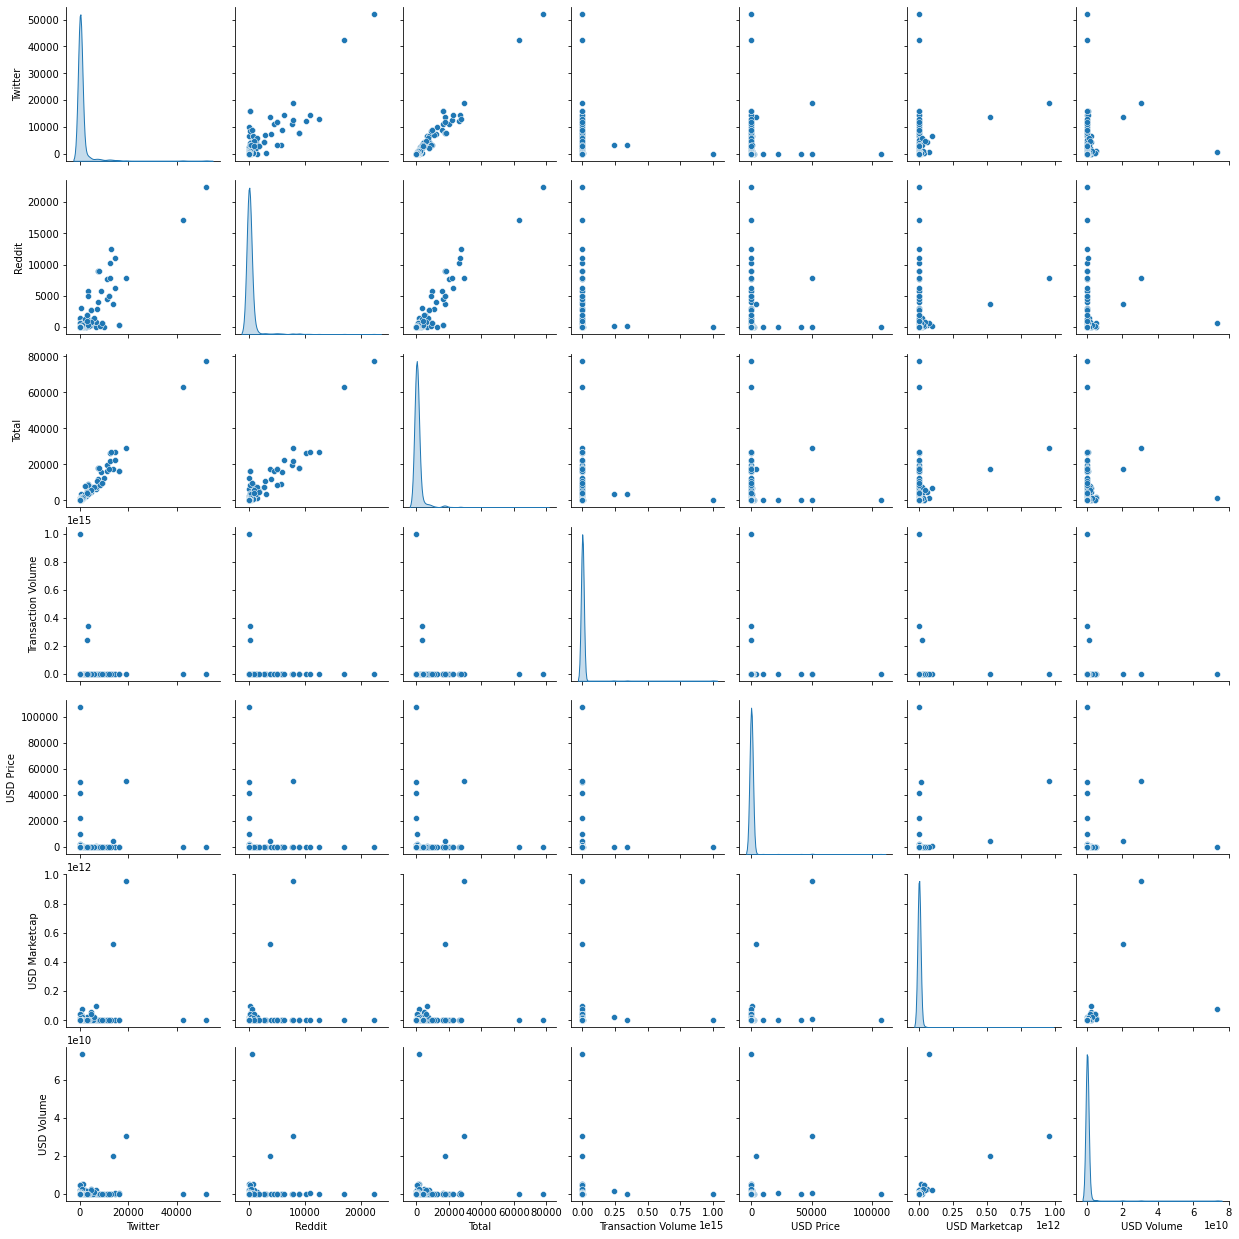

In [588]:
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:ylabel='cooks_d'>

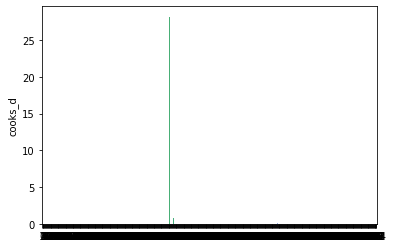

In [163]:
#Test - Checking Cook'D for Outliers

influence = crypto_model_non_log.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)

In [164]:
max_index = influence_frame['cooks_d'].idxmax()
df.iloc[max_index]


Ticker                         USDT
Name                         Tether
Twitter                         721
Reddit                          649
Total                        1504.0
Transaction Volume    59318387623.0
USD Price                  1.001122
USD Marketcap         76292337202.0
USD Volume            73604286504.0
Name: 272, dtype: object

In [589]:
#Test - check vif for collinarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns = ['Ticker', 'Name', 'USD Price'])
x = sm.add_constant(x)
y = df['USD Price']


model = sm.OLS(y, x, data = df)
crypto_model = model.fit()
crypto_model.summary()

vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif


/Users/lisun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


variables         vif
0               const    0.000000
1             Twitter  140.582598
2              Reddit   41.981860
3               Total  300.601854
4  Transaction Volume    1.000947
5       USD Marketcap    1.428030
6          USD Volume    1.342437

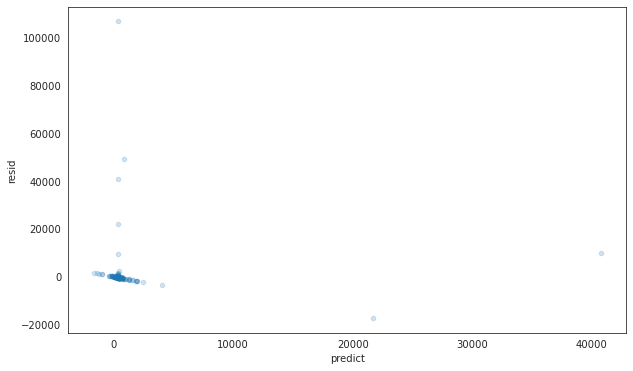

In [590]:
#Test - Non-normality
df['predict']= crypto_model_non_log.predict(x)
df['resid'] = df['USD Price']-df['predict']
with sns.axes_style('white'):
    plot=df.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

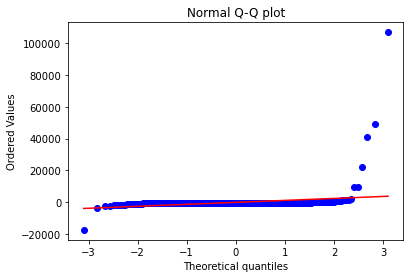

In [591]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

In [592]:
#drop predict and resid
df.drop('resid', axis=1, inplace=True)
df.drop('predict', axis=1, inplace=True)
df

Ticker            Name  Twitter  Reddit   Total  Transaction Volume  \
0     ATOM          Cosmos      451     266   726.0        1.598841e+12   
1     KAVA            Kava        6       1     7.0        1.598841e+12   
2      TRU          TrueFi       17       3    20.0        1.372441e+08   
3     ANCT          Anchor      119      12   132.0        1.598841e+12   
4     ALBT   AllianceBlock        4       4     8.0        6.394549e+07   
..     ...             ...      ...     ...     ...                 ...   
710   SAMO     Samoyedcoin       38       1    39.0        1.598841e+12   
711  SAITO           Saito        8       2    10.0        5.449691e+08   
712  LOTTO           Lotto        8      10    18.0        1.598841e+12   
713   Ever       Everscale     3074    1017  4301.0        1.598841e+12   
714    DPR  Deeper Network        1       2     3.0        5.543234e+07   

     USD Price  USD Marketcap    USD Volume  
0    25.364063   5.729132e+09  5.785691e+08  
1     3.982092   5.703552e+08  6.875262e+07  
2     0.320698   1.760490e+08  1.250333e+07  
3     0.810200   1.039659e+07  6.292306e+03  
4     0.578677   1.348062e+08  2.720597e+06  
..         ...            ...           ...  
710   0.045175   1.232807e+08  1.306518e+07  
711   0.055256   5.886985e+07  4.099738e+06  
712   0.015811   3.162288e+07  3.899815e+03  
713   0.267931   1.970242e+08  4.226416e+06  
714   0.133866   1.387863e+08  2.913974e+06  

[715 rows x 9 columns]

In [18]:
#Taking the Log of all features
df_log = df.apply(lambda x: np.log(x) if x.name in ["USD Price", "USD Marketcap", 'USD Volume', 'Twitter', 'Reddit', 'Total', 'Transaction Volume'] else x)

df_log

Ticker            Name   Twitter    Reddit     Total  Transaction Volume  \
0     ATOM          Cosmos  6.111467  5.583496  6.587550           28.100300   
1     KAVA            Kava  1.791759  0.000000  1.945910           28.100300   
2      TRU          TrueFi  2.833213  1.098612  2.995732           18.737272   
3     ANCT          Anchor  4.779123  2.484907  4.882802           28.100300   
4     ALBT   AllianceBlock  1.386294  1.386294  2.079442           17.973542   
..     ...             ...       ...       ...       ...                 ...   
710   SAMO     Samoyedcoin  3.637586  0.000000  3.663562           28.100300   
711  SAITO           Saito  2.079442  0.693147  2.302585           20.116240   
712  LOTTO           Lotto  2.079442  2.302585  2.890372           28.100300   
713   Ever       Everscale  8.030735  6.924612  8.366603           28.100300   
714    DPR  Deeper Network  0.000000  0.693147  1.098612           17.830674   

     USD Price  USD Marketcap  USD Volume  
0     3.233333      22.468830   20.176069  
1     1.381807      20.161770   18.046025  
2    -1.137256      18.986273   16.341505  
3    -0.210474      16.156989    8.747083  
4    -0.547010      18.719349   14.816362  
..         ...            ...         ...  
710  -3.097207      18.629975   16.385461  
711  -2.895785      17.890840   15.226434  
712  -4.147022      17.269391    8.268684  
713  -1.317025      19.098837   15.256865  
714  -2.010916      18.748446   14.885028  

[715 rows x 9 columns]

In [19]:
#Logged
x = df_log.drop(columns = ['Ticker', 'Name', 'USD Price'])
x = sm.add_constant(x)
y = df_log['USD Price']

model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              USD Price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     90.07
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           7.51e-84
Time:                        12:24:10   Log-Likelihood:                -1814.1
No. Observations:                 715   AIC:                             3642.
Df Residuals:                     708   BIC:                             3674.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.7076      0.842    -11.532      0.000     -11.360      -8.055
Twitter               -0.0630      0.273     -0.231      0.817      -0.599       0.473
Reddit                 0.3466      0.144      2.401      0.017       0.063       0.630
Total                 -0.3580      0.371     -0.965      0.335      -1.087       0.371
Transaction Volume    -0.1767      0.017    -10.171      0.000      -0.211      -0.143
USD Marketcap          0.6539      0.069      9.453      0.000       0.518       0.790
USD Volume             0.0914      0.051      1.805      0.071      -0.008       0.191
==============================================================================
Omnibus:                       43.491   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.857
Skew:                          -0.224   Prob(JB):                     3.84e-29
Kurtosis:                       5.047   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

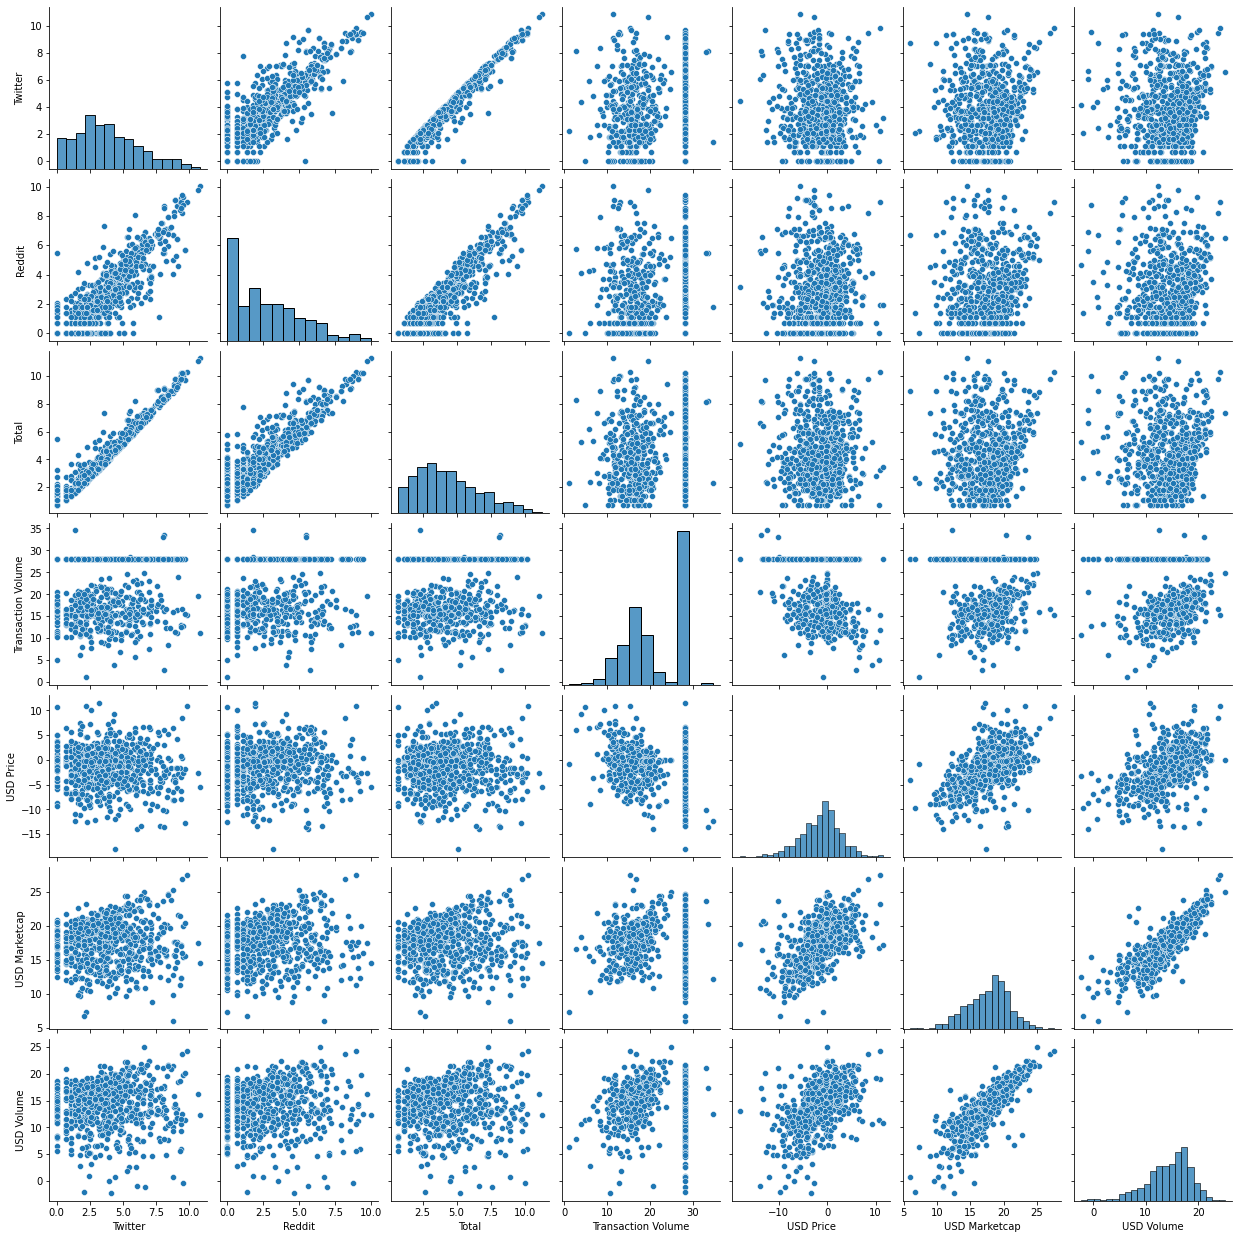

In [20]:
sns.pairplot(df_log)

<AxesSubplot:ylabel='cooks_d'>

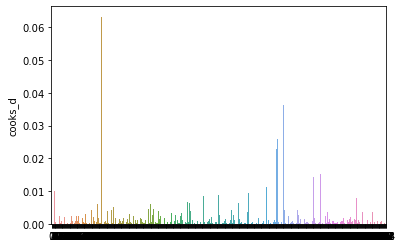

In [21]:
#Test_Log - Checking Cook'D for Outliers

influence = crypto_model.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)
#outliers look okay

In [22]:
max_index = influence_frame['cooks_d'].idxmax()
df_log.iloc[max_index]
#outliers seems to be okay

Ticker                     GAFI
Name                     GameFi
Twitter                7.770645
Reddit                 1.098612
Total                  7.772753
Transaction Volume      28.1003
USD Price               4.97737
USD Marketcap         18.790978
USD Volume            15.588457
Name: 106, dtype: object

In [23]:
#Test_log - check vif for collinarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df_log.drop(columns = ['Ticker', 'Name', 'USD Price'])
x = sm.add_constant(x)
y = df_log['USD Price']


model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

#collinarity is okay

variables        vif
0               const  53.596017
1             Twitter  30.635990
2              Reddit   8.379835
3               Total  52.530911
4  Transaction Volume   1.013721
5       USD Marketcap   3.596097
6          USD Volume   3.551182

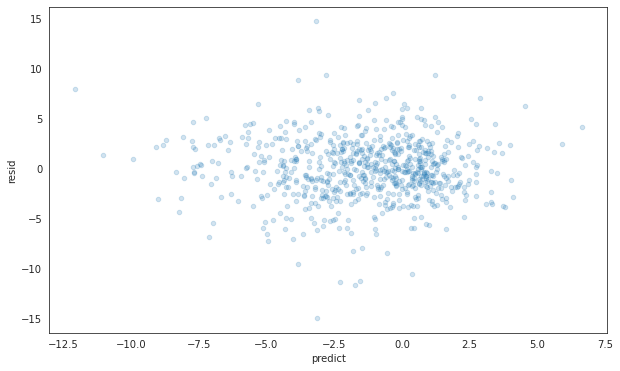

In [24]:
#Test - Non-normality
df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['USD Price']-df_log['predict']
with sns.axes_style('white'):
    plot=df_log.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

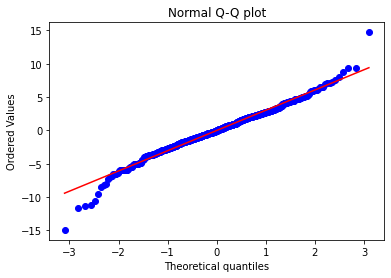

In [25]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df_log['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

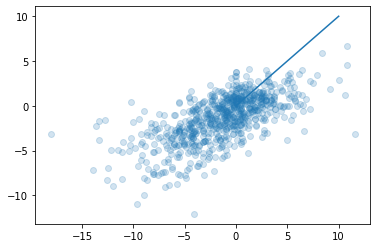

In [26]:
#plotting against residuals in baseline model

df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['USD Price']-df_log['predict']
plt.scatter(df_log['USD Price'], df_log['predict'], alpha=0.2)
plt.plot([0, 10], [0, 10])

In [27]:
df_log

Ticker            Name   Twitter    Reddit     Total  Transaction Volume  \
0     ATOM          Cosmos  6.111467  5.583496  6.587550           28.100300   
1     KAVA            Kava  1.791759  0.000000  1.945910           28.100300   
2      TRU          TrueFi  2.833213  1.098612  2.995732           18.737272   
3     ANCT          Anchor  4.779123  2.484907  4.882802           28.100300   
4     ALBT   AllianceBlock  1.386294  1.386294  2.079442           17.973542   
..     ...             ...       ...       ...       ...                 ...   
710   SAMO     Samoyedcoin  3.637586  0.000000  3.663562           28.100300   
711  SAITO           Saito  2.079442  0.693147  2.302585           20.116240   
712  LOTTO           Lotto  2.079442  2.302585  2.890372           28.100300   
713   Ever       Everscale  8.030735  6.924612  8.366603           28.100300   
714    DPR  Deeper Network  0.000000  0.693147  1.098612           17.830674   

     USD Price  USD Marketcap  USD Volume   predict     resid  
0     3.233333      22.468830   20.176069  1.052504  2.180829  
1     1.381807      20.161770   18.046025 -0.651627  2.033434  
2    -1.137256      18.986273   16.341505  0.018083 -1.155339  
3    -0.210474      16.156989    8.747083 -4.498526  4.288052  
4    -0.547010      18.719349   14.816362  0.358121 -0.905131  
..         ...            ...         ...       ...       ...  
710  -3.097207      18.629975   16.385461 -2.536266 -0.560941  
711  -2.895785      17.890840   15.226434 -0.888645 -2.007140  
712  -4.147022      17.269391    8.268684 -2.994572 -1.152449  
713  -1.317025      19.098837   15.256865 -1.893651  0.576626  
714  -2.010916      18.748446   14.885028  0.606982 -2.617898  

[715 rows x 11 columns]

In [28]:
#drop predict and resid
df_log.drop('predict', axis=1, inplace=True)
df_log.drop('resid', axis=1, inplace=True)
df_log

Ticker            Name   Twitter    Reddit     Total  Transaction Volume  \
0     ATOM          Cosmos  6.111467  5.583496  6.587550           28.100300   
1     KAVA            Kava  1.791759  0.000000  1.945910           28.100300   
2      TRU          TrueFi  2.833213  1.098612  2.995732           18.737272   
3     ANCT          Anchor  4.779123  2.484907  4.882802           28.100300   
4     ALBT   AllianceBlock  1.386294  1.386294  2.079442           17.973542   
..     ...             ...       ...       ...       ...                 ...   
710   SAMO     Samoyedcoin  3.637586  0.000000  3.663562           28.100300   
711  SAITO           Saito  2.079442  0.693147  2.302585           20.116240   
712  LOTTO           Lotto  2.079442  2.302585  2.890372           28.100300   
713   Ever       Everscale  8.030735  6.924612  8.366603           28.100300   
714    DPR  Deeper Network  0.000000  0.693147  1.098612           17.830674   

     USD Price  USD Marketcap  USD Volume  
0     3.233333      22.468830   20.176069  
1     1.381807      20.161770   18.046025  
2    -1.137256      18.986273   16.341505  
3    -0.210474      16.156989    8.747083  
4    -0.547010      18.719349   14.816362  
..         ...            ...         ...  
710  -3.097207      18.629975   16.385461  
711  -2.895785      17.890840   15.226434  
712  -4.147022      17.269391    8.268684  
713  -1.317025      19.098837   15.256865  
714  -2.010916      18.748446   14.885028  

[715 rows x 9 columns]

In [121]:
#Cross Valditation Trial

In [29]:
# Baseline Model - 70 to 30 Train vs Test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Ticker', 'Name', 'USD Price'])
y = df_log['USD Price']

X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.3,     
                                       random_state=7)

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.43356981490901725
0.42317409551537133


In [31]:
#Baseline - Train, Validation, Test (60, 20, 20)
X = df_log.drop(columns=['Ticker', 'Name', 'USD Price'])
y = df_log['USD Price']

X, X_test, y, y_test = train_test_split(X, y,
                                       test_size = 0.2,
                                       random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.25,
                                                 random_state=30) 

model = LinearRegression()
lr = model.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_val)
print(r_squared_test)

0.4043635249108085
0.46160699338325173
0.4664030435108706


In [32]:
#5-fold cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

X, X_test, y, y_test = train_test_split(X, y,
                                           test_size=.2,
                                           random_state=7)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#collect the validation results for both models
cv_lm_r2s, cv_lm_scale_r2s =[], []
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    #simple Linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

mean_r2 = np.mean(cv_lm_r2s)
std_r2 = np.std(cv_lm_r2s)

Simple regression scores:  [0.40857895118211784, 0.44253694290729206, 0.41820863172560974, 0.4031523242575986, 0.33706387464586085]
Simple mean cv r^2: 0.402 +- 0.035


In [33]:
list(zip(X_train.columns, model.coef_))

[('Twitter', -0.07184291781083375),
 ('Reddit', 0.5273879136847203),
 ('Total', -0.5873369089988261),
 ('Transaction Volume', -0.17488342629542072),
 ('USD Marketcap', 0.6112519850562903),
 ('USD Volume', 0.10166614973623854)]

In [199]:
#APPLYING RIDGE to resolve overfitting

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#defining X and y
X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

#splitting the dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=7)

# .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)

## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)

from sklearn.linear_model import Ridge
lr_model_ridge = Ridge(alpha = 16.446761779946645) 
lr_model_ridge.fit(X_tr, y_train)
ridge_test_r2 = lr_model_ridge.score(X_te, y_test)

print(lr_model_ridge.score(X_tr, y_train))
print(lr_model_ridge.score(X_te, y_test))

0.4195566265968008
0.47183966445624925


In [35]:
# Find Optimal lambda for Ridge
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import numpy as np

alphas = np.logspace(-5,5)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train.columns, lr_model_ridge.coef_))
alpha = ridge_model.alpha_

In [36]:
r_squared_test

0.4708821828206611

In [37]:
alphas

array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
       1.20679264e-01, 1.93069773e-01, 3.08884360e-01, 4.94171336e-01,
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])

In [38]:
ridge_model.score(X_tr, y_train)

0.4192225794406038

In [39]:
alpha

21.209508879201927

In [229]:
#LASSO

In [40]:
#Goal - to remove overfitting
X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

lasso = Lasso(alpha = 1)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)

print(lasso.score(X_tr, y_train))
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))


0.2795388768508714
0.323468765201264
[('Twitter', -0.0), ('Reddit', -0.0), ('Total', -0.0), ('Transaction Volume', -0.17870125389591343), ('USD Marketcap', 1.3121311677916307), ('USD Volume', 0.0)]


In [632]:
#Goal - accuracy
X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

lasso = Lasso(alpha = 0.1)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)

print(lasso.score(X_tr, y_train))
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))


0.43430502322200437
0.38145745885362614
[('Twitter', -0.26468536702652795), ('Reddit', 0.0), ('Total', -0.0), ('Transaction Volume', -1.244134372160627), ('USD Marketcap', 1.7624824194615871), ('USD Volume', 0.44731615340349024)]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

enet = ElasticNet(alpha = 0.01, l1_ratio=.5)
enet.fit(X_tr, y_train)
test_r_squared = enet.score(X_te, y_test)

print(enet.score(X_tr, y_train))
print(test_r_squared)
print(list(zip(X_train.columns, enet.coef_)))

0.4201474889461081
0.47449749333672553
[('Twitter', -0.3626223215204497), ('Reddit', 0.6673124009353011), ('Total', -0.553096026638527), ('Transaction Volume', -1.1492336382602308), ('USD Marketcap', 1.934565984205764), ('USD Volume', 0.47901089069949143)]


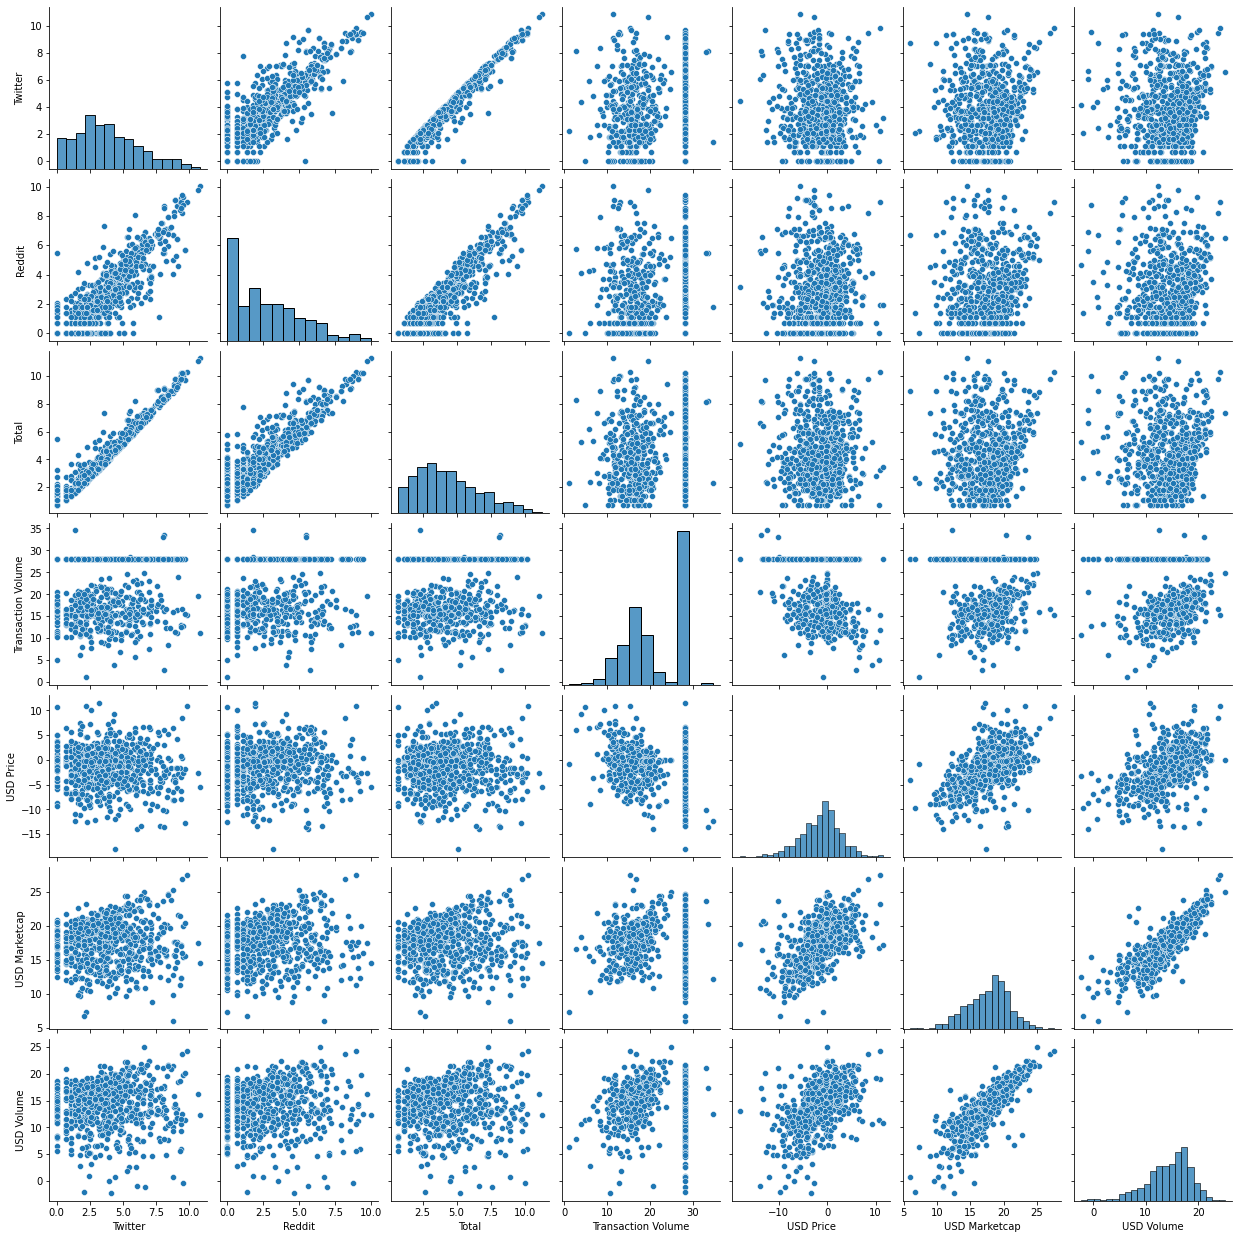

In [264]:
sns.pairplot(df_log)

In [ ]:
#Dumming Variables

In [42]:
df_dummy = df_log.copy()
df_dummy = pd.get_dummies(df_dummy, drop_first=False)

X = df_dummy.drop(columns=['USD Price'])
y = df_dummy['USD Price']

model = LinearRegression()
lr = model.fit(X,y)

r_squared = lr.score(X,y)
print(r_squared)

1.0


In [281]:
x = df_dummy.drop(columns = ['USD Price'])
x = sm.add_constant(x)
y = df_dummy['USD Price']

model = sm.OLS(y, x, data = df_dummy)
crypto_model = model.fit()
crypto_model.summary()

/Users/lisun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/lisun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/lisun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              USD Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 Dec 2021   Prob (F-statistic):                nan
Time:                        22:55:40   Log-Likelihood:                 20122.
No. Observations:                 715   AIC:                        -3.881e+04
Df Residuals:                       0   BIC:                        -3.554e+04
Df Model:                         714                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -8.3611        inf         -0        nan         nan         nan
Twitter                                     0.0102        inf          0        nan         nan         nan
Reddit                                      0.3997        inf          0        nan         nan         nan
Total                                      -0.4963        inf         -0        nan         nan         nan
Transaction Volume                         -0.1864        inf         -0        nan         nan         nan
USD Marketcap                               0.5797        inf          0        nan         nan         nan
USD Volume                                  0.1174        inf          0        nan         nan         nan
Ticker_1INCH                               -0.2351        inf         -0        nan         nan         nan
Ticker_AAVE                                 1.2474        inf          0        nan         nan         nan
Ticker_ABT                                 -0.2542        inf         -0        nan         nan         nan
Ticker_ABYSS                               -1.2142        inf         -0        nan         nan         nan
Ticker_ACH                                 -0.8821        inf         -0        nan         nan         nan
Ticker_ACT                                 -0.6292        inf         -0        nan         nan         nan
Ticker_ADA                                 -0.6571        inf         -0        nan         nan         nan
Ticker_ADS                                  1.7081        inf          0        nan         nan         nan
Ticker_AGLD                                 0.0087        inf          0        nan         nan         nan
Ticker_AKT                                  0.9308        inf          0        nan         nan         nan
Ticker_ALBT                                -0.4815        inf         -0        nan         nan         nan
Ticker_ALCX                                 1.7614        inf          0        nan         nan         nan
Ticker_ALGO                                -0.4208        inf         -0        nan         nan         nan
Ticker_ALI                                 -1.2697        inf         -0        nan         nan         nan
Ticker_ALICE                                0.5401        inf          0        nan         nan         nan
Ticker_ALPHA                                0.0424        inf          0        nan         nan         nan
Ticker_ALT                                  1.5569        inf          0        nan         nan         nan
Ticker_AMB                                  0.0815        inf          0        nan         nan         nan
Ticker_AMP                                 -0.9908        i

In [278]:
df_log

Ticker            Name   Twitter    Reddit     Total  Transaction Volume  \
0     ATOM          Cosmos  6.111467  5.583496  6.587550           28.100300   
1     KAVA            Kava  1.791759  0.000000  1.945910           28.100300   
2      TRU          TrueFi  2.833213  1.098612  2.995732           18.737272   
3     ANCT          Anchor  4.779123  2.484907  4.882802           28.100300   
4     ALBT   AllianceBlock  1.386294  1.386294  2.079442           17.973542   
..     ...             ...       ...       ...       ...                 ...   
710   SAMO     Samoyedcoin  3.637586  0.000000  3.663562           28.100300   
711  SAITO           Saito  2.079442  0.693147  2.302585           20.116240   
712  LOTTO           Lotto  2.079442  2.302585  2.890372           28.100300   
713   Ever       Everscale  8.030735  6.924612  8.366603           28.100300   
714    DPR  Deeper Network  0.000000  0.693147  1.098612           17.830674   

     USD Price  USD Marketcap  USD Volume  
0     3.233333      22.468830   20.176069  
1     1.381807      20.161770   18.046025  
2    -1.137256      18.986273   16.341505  
3    -0.210474      16.156989    8.747083  
4    -0.547010      18.719349   14.816362  
..         ...            ...         ...  
710  -3.097207      18.629975   16.385461  
711  -2.895785      17.890840   15.226434  
712  -4.147022      17.269391    8.268684  
713  -1.317025      19.098837   15.256865  
714  -2.010916      18.748446   14.885028  

[715 rows x 9 columns]

In [265]:
#Polynomials

In [43]:
#Baseline Polynomial
from sklearn.preprocessing import PolynomialFeatures

X = df_log.drop(columns=['USD Price', 'Ticker', 'Name'])
y = df_log['USD Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
print(lr_poly.score(X_train_poly,y_train))
print(lr_poly.score(X_test_poly,y_test))

print(list(zip(X_train.columns, lr_poly.coef_)))
#print(lr_poly.coef_)

0.5226196783406476
0.481959932992408
[('Twitter', -5.848305318382179e-13), ('Reddit', 0.01916880908183095), ('Total', -2.2552009726783404), ('Transaction Volume', 3.232895421817869), ('USD Marketcap', -0.9719251252703301), ('USD Volume', 2.287417006603383)]


In [304]:
#X_train

In [303]:
#poly.get_feature_names()

In [44]:
print(list(zip(X_train.columns, lr_poly.coef_)))

[('Twitter', -5.848305318382179e-13), ('Reddit', 0.01916880908183095), ('Total', -2.2552009726783404), ('Transaction Volume', 3.232895421817869), ('USD Marketcap', -0.9719251252703301), ('USD Volume', 2.287417006603383)]


In [55]:
#Lasso

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train_poly)
X_te = scaler.fit_transform(X_test_poly)

lasso = Lasso(alpha = 0.018464249428955443)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)

print(lasso.score(X_tr, y_train))
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))

0.4923336457484554
0.5376881362460999
[('Twitter', 0.0), ('Reddit', 0.04291771385762595), ('Total', 0.6364653209820107), ('Transaction Volume', 0.0), ('USD Marketcap', -5.077796767980393), ('USD Volume', 2.822347885031807)]


In [654]:
#ELastic Net
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

X_tr = scaler.fit_transform(X_train_poly)
X_te = scaler.fit_transform(X_test_poly)

enet = ElasticNet(alpha = 0.6, l1_ratio=0.01)
enet.fit(X_tr, y_train)
test_r_squared = enet.score(X_te, y_test)

print(enet.score(X_tr, y_train))
print(test_r_squared)
print(list(zip(X_train.columns, enet.coef_)))

0.4230535975148484
0.32810792881794426
[('Twitter', 0.0), ('Reddit', -0.056298395554472525), ('Total', 0.08237774296644793), ('Transaction Volume', -0.025098099372373305), ('USD Marketcap', -0.4349149853074466), ('USD Volume', 0.5481546700782466)]


In [73]:
#Applying Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## apply the scaler to the train set
X_tr = scaler.fit_transform(X_train_poly)
## Apply the scaler to the test set
X_te = scaler.fit_transform(X_test_poly)

from sklearn.linear_model import Ridge
lr_model_ridge = Ridge(alpha = 1.059560179277617)
lr_model_ridge.fit(X_tr, y_train)
ridge_test_r2 = lr_model_ridge.score(X_te, y_test)

print(lr_model_ridge.score(X_tr, y_train))
print(lr_model_ridge.score(X_te, y_test))
list(zip(X_train.columns, lr_model_ridge.coef_))

0.5085970670662705
0.5166870367396064


[('Twitter', 0.0),
 ('Reddit', 1.5524688696600386),
 ('Total', -0.7187081925047424),
 ('Transaction Volume', 1.265546116901067),
 ('USD Marketcap', -5.597411095490038),
 ('USD Volume', 3.8996487406834492)]

In [672]:
# Find Optimal lambda for Ridge
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import numpy as np

alphas = 10*np.linspace(0,0.01,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train.columns, lr_model_ridge.coef_))
alpha = ridge_model.alpha_

In [673]:
r_squared_test

0.5538765623150661

In [674]:
ridge_model.score(X_tr, y_train)

0.5011603388314072

In [675]:
alpha

0.1

In [ ]:
#ENET 2nd Try

In [676]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

## apply the scaler to the train set
X_tr = scaler.fit_transform(X_train_poly)
## Apply the scaler to the test set
X_te = scaler.fit_transform(X_test_poly)

enet = ElasticNet(alpha = 0.1, l1_ratio=0.05)
enet.fit(X_tr, y_train)
test_r_squared = enet.score(X_te, y_test)

print(enet.score(X_tr, y_train))
print(test_r_squared)
#print(list(zip(X_train.columns, enet.coef_)))
list(zip(X_train.columns, enet.coef_))

0.4247759372784309
0.4672127281431657


[('Twitter', 0.0),
 ('Reddit', 0.1467631091131115),
 ('Total', 0.2705049899343155),
 ('Transaction Volume', 0.19629978510953466),
 ('USD Marketcap', -0.8309121097152822),
 ('USD Volume', 0.8860036317665477)]

In [541]:
from sklearn.model_selection import KFold
from matplotlib import pyplot


X_tr = scaler.fit_transform(X_train_poly)
X_te = scaler.fit_transform(X_test_poly)

alpha_list = 10*np.linspace(0,2,200)

train_scores=[]
val_scores=[]

for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Lasso(alpha=a)
    kf = KFold(n_splits=3)
    kf.get_n_splits(X_train_std) #confirm -> x_train data set post scaler
    
    sm_train_scores=[]
    sm_val_scores=[]
    for train_index, val_index in kf.split(X_train_std,y_train):
        #print("TRAIN:", train_index, "Val:", val_index)
        X_train_std_k, X_val_std_k = X_train_std[train_index], X_train_std[val_index]
        y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_train_std_k,y_train_k)
        sm_train_scores.append(clf.score(X_train_std_k,y_train_k))
        sm_val_scores.append(clf.score(X_val_std_k,y_val_k))
    train_scores.append(np.mean(sm_train_scores))
    val_scores.append(np.mean(sm_val_scores))
    
plt.plot(alpha_list,train_scores,label='train_score')
plt.plot(alpha_list,val_scores,label='val_score');
plt.legend();
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_test');

NameError: name 'alpha_list' is not defined

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

 569 570 571] Val: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

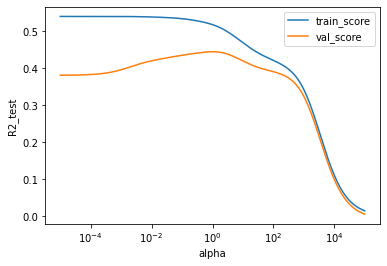

In [56]:
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn import linear_model

X_tr = scaler.fit_transform(X_train_poly)
X_te = scaler.fit_transform(X_test_poly)

alpha_list = np.logspace(-5,5,200)

train_scores=[]
val_scores=[]

for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Ridge(alpha=a)
    kf = KFold(n_splits=3)
    kf.get_n_splits(X_tr) #confirm -> x_train data set post scaler
    
    sm_train_scores=[]
    sm_val_scores=[]
    for train_index, val_index in kf.split(X_tr,y_train):
        print("TRAIN:", train_index, "Val:", val_index)
        X_train_std_k, X_val_std_k = X_tr[train_index], X_tr[val_index]
        y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_train_std_k,y_train_k)
        sm_train_scores.append(clf.score(X_train_std_k,y_train_k))
        sm_val_scores.append(clf.score(X_val_std_k,y_val_k))
    train_scores.append(np.mean(sm_train_scores))
    val_scores.append(np.mean(sm_val_scores))
    
plt.plot(alpha_list,train_scores,label='train_score')
plt.plot(alpha_list,val_scores,label='val_score');
plt.legend();
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_test');

In [575]:
val_scores

[-0.0628623955317209,
 -0.06286078450717751,
 -0.06285897483348069,
 -0.06285694408847031,
 -0.06285467005461472,
 -0.06285210703091833,
 -0.06284921487297794,
 -0.06284596020034372,
 -0.06284227975769456,
 -0.06283814533738667,
 -0.06283349648052831,
 -0.06282826344849468,
 -0.06282231207654505,
 -0.06281559789459161,
 -0.06280805002605579,
 -0.06279948097227576,
 -0.06278969428815562,
 -0.06277864934880473,
 -0.06276621034704788,
 -0.06275202608016824,
 -0.0627358722300299,
 -0.06271756690130655,
 -0.06269672979210379,
 -0.06267312809089498,
 -0.06264612202914055,
 -0.0626158311993592,
 -0.06258128902459108,
 -0.06254223102283067,
 -0.06249825262053036,
 -0.062448827088343574,
 -0.062393724424485354,
 -0.062332097552540024,
 -0.06226471744443566,
 -0.06219126826237723,
 -0.062112060616653274,
 -0.06202763311142904,
 -0.06193659874873333,
 -0.06183963227522541,
 -0.061710610040745704,
 -0.061541422221547425,
 -0.06137465735593802,
 -0.06119732348005661,
 -0.06100610019563694,
 -0.0608

In [576]:
X_tr.shape

(572, 21)

In [581]:
pd.DataFrame(X_train_poly).describe()

0           1           2           3           4           5   \
count  572.0  572.000000  572.000000  572.000000  572.000000  572.000000   
mean     1.0    3.854868    2.773617   21.068271   17.728362   14.416145   
std      0.0    2.350946    2.338693    6.696209    3.087151    4.199622   
min      1.0    0.000000    0.000000    1.098612    6.009997   -2.284116   
25%      1.0    2.079442    0.693147   15.514810   15.675999   12.184241   
50%      1.0    3.555348    2.302585   19.670829   18.161806   15.121525   
75%      1.0    5.348295    4.237704   28.100300   19.790858   17.321674   
max      1.0   10.860920   10.015431   34.537854   26.982847   25.021969   

               6           7           8           9   ...          11  \
count  572.000000  572.000000  572.000000  572.000000  ...  572.000000   
mean    20.377294   15.322770   82.057162   68.599162  ...   13.152870   
std     22.179239   19.491078   60.360375   44.322617  ...   18.147276   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      4.324077    1.441359   38.955287   35.866790  ...    0.480453   
50%     12.640500    7.975701   69.826622   62.130041  ...    5.301898   
75%     28.604266   21.734438  109.275574   94.444533  ...   17.958171   
max    117.959588  108.776801  272.185176  256.706685  ...  100.308865   

               12          13          14           15          16  \
count  572.000000  572.000000  572.000000   572.000000  572.000000   
mean    58.532090   49.585222   40.084571   488.632864  374.402650   
std     55.982971   43.144135   37.185001   276.085100  138.127935   
min      0.000000    0.000000  -10.694529     1.206949    8.058163   
25%     16.496071   13.330877   10.489453   240.709329  264.678358   
50%     45.225688   40.710463   31.710633   386.941631  360.802223   
75%     83.509733   77.049683   63.472591   789.626855  490.164789   
max    265.177986  221.947494  195.141285  1192.863357  786.054059   

               17          18          19          20  
count  572.000000  572.000000  572.000000  572.000000  
mean   304.082866  323.808643  266.548308  225.431214  
std    134.249122  106.514756  109.975879  108.962912  
min    -55.518322   36.120061  -28.749019    0.000754  
25%    202.408663  245.736938  190.616311  148.455833  
50%    290.069732  329.851212  274.449442  228.661253  
75%    400.829702  391.678075  340.683415  300.040383  
max    697.733116  728.074048  640.139264  626.098938  

[8 rows x 21 columns]

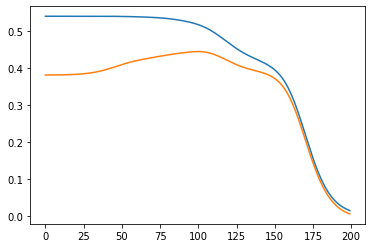

In [57]:
plt.plot(train_scores)
plt.plot(val_scores)

In [58]:
np.argmax(val_scores)
#val_scores[65]
#alpha_list[65]

100

In [59]:
np.argmax(train_scores)
#val_scores[65]
alpha_list[65]

0.018464249428955443

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

 569 570 571] Val: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

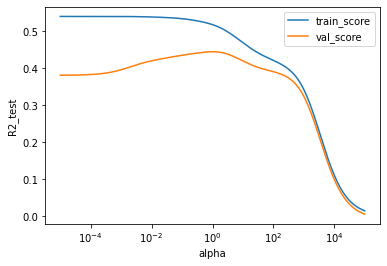

In [701]:
#Trying Ridge with loops
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn import linear_model

X_tr = scaler.fit_transform(X_train_poly)
X_te = scaler.fit_transform(X_test_poly)

alpha_list = np.logspace(-5,5,200)

train_scores=[]
val_scores=[]

for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Ridge(alpha=a)
    kf = KFold(n_splits=3)
    kf.get_n_splits(X_tr) #confirm -> x_train data set post scaler
    
    sm_train_scores=[]
    sm_val_scores=[]
    for train_index, val_index in kf.split(X_tr,y_train):
        print("TRAIN:", train_index, "Val:", val_index)
        X_train_std_k, X_val_std_k = X_tr[train_index], X_tr[val_index]
        y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_train_std_k,y_train_k)
        sm_train_scores.append(clf.score(X_train_std_k,y_train_k))
        sm_val_scores.append(clf.score(X_val_std_k,y_val_k))
    train_scores.append(np.mean(sm_train_scores))
    val_scores.append(np.mean(sm_val_scores))
    
plt.plot(alpha_list,train_scores,label='train_score')
plt.plot(alpha_list,val_scores,label='val_score');
plt.legend();
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_test');

In [63]:
np.argmax(val_scores)
val_scores[100]
alpha_list[100]

1.059560179277617

In [64]:
clf = linear_model.Ridge(alpha=1.059560179277617)
sm_train_scores=[]
sm_val_scores=[]
for train_index, val_index in kf.split(X_tr,y_train):
    print("TRAIN:", train_index, "Val:", val_index)
    X_train_std_k, X_val_std_k = X_tr[train_index], X_tr[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
    clf.fit(X_train_std_k,y_train_k)
    sm_train_scores.append(clf.score(X_train_std_k,y_train_k))
    sm_val_scores.append(clf.score(X_val_std_k,y_val_k))
train_scores.append(np.mean(sm_train_scores))
val_scores.append(np.mean(sm_val_scores))

TRAIN: [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435

In [61]:
np.argsort(np.abs(clf.coef_))

array([ 0, 13,  2,  3, 14, 23,  8, 18,  1,  9,  7, 15, 11, 24, 16, 12, 20,
       19, 17, 10, 21, 22,  4,  6, 27, 26, 25,  5])

In [66]:
clf.coef_

array([ 0.        ,  1.45672431,  0.63355911,  2.07333645, -4.92641145,
        2.0986511 ,  1.94969793, -0.14562291,  0.71123058, -0.39882834,
        0.0945193 , -1.54396044,  0.25047475,  0.88978272, -0.95615193,
       -0.5848719 ,  0.50955167, -0.52012946, -0.95696231, -0.88533536,
       -0.83533477, -0.51502223,  6.05548174, -0.49539998, -1.86130867,
        0.72538381,  0.9749726 , -0.57951533])

In [82]:
poly.get_feature_names()[22]

'x3^2'

In [706]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2']